In [1]:
import pandas as pd

In [10]:
gov_corr = pd.read_csv(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\Mini_project_3\Queries\gov_corruption_vs_happiness.csv")

gov_corr

,country_name,avg_government_corruption,avg_happiness_score
0,Denmark,0.429,7.546
1,Norway,0.344,7.541
2,Finland,0.398,7.538
3,Switzerland,0.380,7.511
4,Canada,0.306,7.351
5,Sweden,0.398,7.319
6,New Zealand,0.400,7.313
7,Australia,0.315,7.276
8,Luxembourg,0.337,6.936
9,Oman,0.325,6.853


Query to discover the corruption vs happiness:

SELECT
	c.country_name,
    ROUND(AVG(f.government_corruption), 3) AS avg_government_corruption,
    ROUND(AVG(f.happiness_score), 3) AS avg_happiness_score
FROM factors AS f
JOIN country AS c ON f.country_id = c.country_id
GROUP BY c.country_name
HAVING avg_government_corruption > 0.3 AND avg_happiness_score > 6
ORDER BY avg_happiness_score DESC;

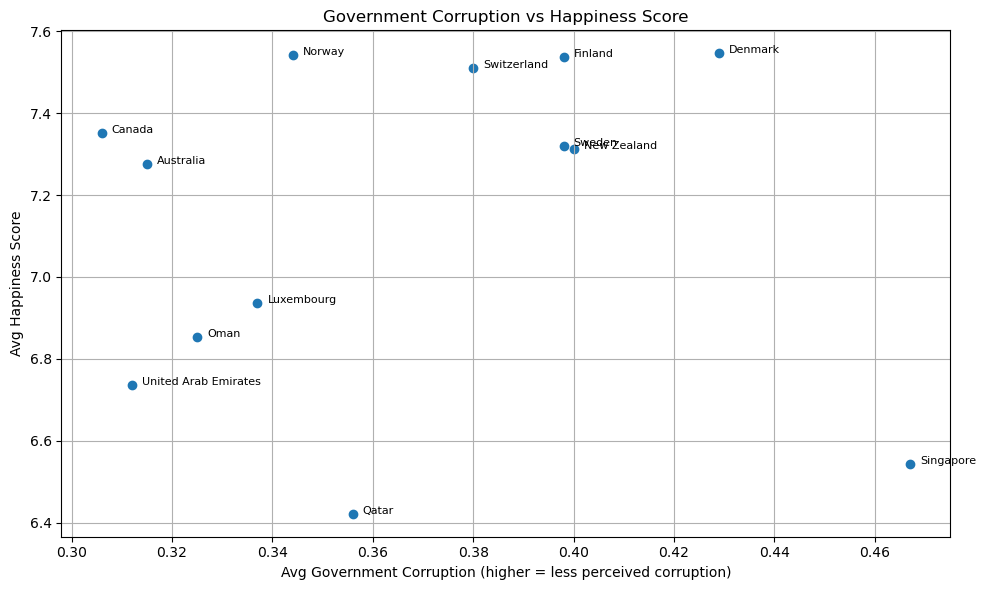

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(gov_corr['avg_government_corruption'], gov_corr['avg_happiness_score'])

# Adicionar nomes dos países como rótulos
for i, row in gov_corr.iterrows():
    plt.text(row['avg_government_corruption'] + 0.002, row['avg_happiness_score'], row['country_name'], fontsize=8)

plt.title("Government Corruption vs Happiness Score")
plt.xlabel("Avg Government Corruption (higher = less perceived corruption)")
plt.ylabel("Avg Happiness Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
top_5_df = pd.read_csv(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\Mini_project_3\Queries\top_5_happy_countries_year.csv")

top_5_df

,country_name,year,happiness_score,life_expectancy
0,Switzerland,2015,7.587,0.941430
1,Iceland,2015,7.561,0.947840
2,Denmark,2015,7.527,0.874640
3,Norway,2015,7.522,0.885210
4,Canada,2015,7.427,0.905630
5,Denmark,2016,7.526,0.795040
6,Switzerland,2016,7.509,0.863030
7,Iceland,2016,7.501,0.867330
8,Norway,2016,7.498,0.795790
9,Finland,2016,7.413,0.810910


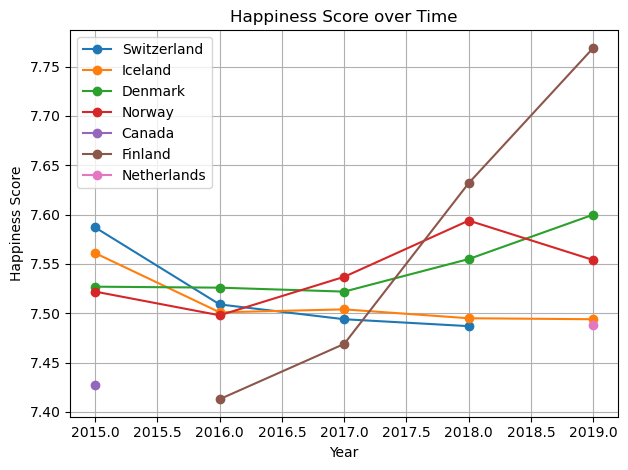

In [16]:
for country in top_5_df['country_name'].unique():
    country_data = top_5_df[top_5_df['country_name'] == country]
    plt.plot(country_data['year'], country_data['happiness_score'], marker='o', label=country)

plt.title("Happiness Score over Time")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

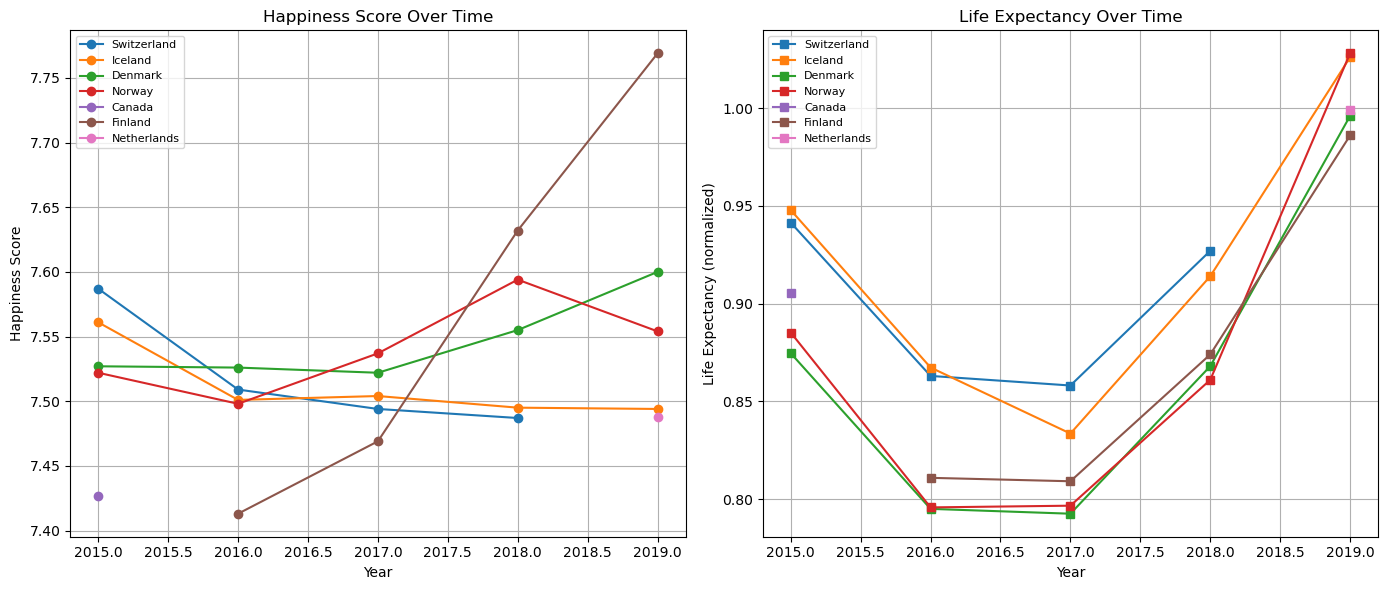

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Chart 1: Happiness Score
for country in top_5_df['country_name'].unique():
    subset = top_5_df[top_5_df['country_name'] == country]
    axes[0].plot(subset['year'], subset['happiness_score'], marker='o', label=country)

axes[0].set_title("Happiness Score Over Time")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Happiness Score")
axes[0].grid(True)
axes[0].legend(fontsize=8)

# Chart 2: Life Expectancy
for country in top_5_df['country_name'].unique():
    subset = top_5_df[top_5_df['country_name'] == country]
    axes[1].plot(subset['year'], subset['life_expectancy'], marker='s', label=country)

axes[1].set_title("Life Expectancy Over Time")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Life Expectancy (normalized)")
axes[1].grid(True)
axes[1].legend(fontsize=8)

plt.tight_layout()
plt.show()